**Exercício 1**: Ajuste um perceptron para resolver o problema de classificação de padrões contido nos arquivos entradasclassalunos.txt e saidaclassalunos.txt, os quais contém entradas e saída desejada, respectivamente. Após o treinamento, use o arquivo entradasclassteste.txt como entrada do perceptron e calcule o vetor de saída. Envie um arquivo com o vetor de saída (use o arquivo submissaoperceptron.txt como exemplo). Seu classificador será avaliado em um banco de dados de teste e sua nota nesta prática será o desempenho obtido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Hardlim(value):
  if value >= 0:
    return 1 
  else:
    return 0

In [3]:
def Single_Neuron(X,W):
  Y = Hardlim(np.dot(X,W))
  return Y

In [4]:
def Print_Matrix(Matrix):
  Lines = len(Matrix)
  Columns = len(Matrix[0])
  #print(Lines,Columns)
  for i in range(Lines):
      for j in range(Columns):
          if(j == Columns - 1):
              print(" %d " %Matrix[i][j], end = "\n")
          else:
              print(" %d " %Matrix[i][j], end = "")
  print()

In [5]:
def Perceptron(X,W,Eta,Max_Ep,Tol):
  Vx = np.array(X[["B","X1","X2","X3","X4","X5","X6","X7","X8","X9"]])
  Yd = np.array(X[["Y"]]) #Saida desejada
  print('\nEntrada:\n', Vx)

  Ep_Atual = 1
  Erro_Med = [1]
  Perda = np.zeros(len(Yd))
  while (Erro_Med[-1] >= Tol):
    if (Ep_Atual > Max_Ep):
      break

    for Indice,Dados in enumerate(Vx):
      Yc = Single_Neuron(Dados, W) #Saída calculada
      Perda[Indice] = Yd[Indice] - Yc
      if Perda[Indice] != 0:
        Delta_W = Eta*Perda[Indice]*Dados
        W += Delta_W
    Erro_Med.append(np.mean(Perda**2))
    Ep_Atual += 1

    if (Ep_Atual % 100) == 0:
      print('Erro Médio encontrado: ', Erro_Med, ' em ', Ep_Atual, ' iterações')

  return W, Erro_Med,Ep_Atual

      X1    X2    X3    X4   X5    X6    X7    X8    X9  B    Y
0    1.0   1.0   1.0   1.0  2.0   1.0   3.0   1.0   1.0 -1  1.0
1    5.0   2.0   3.0   4.0  2.0   7.0   3.0   6.0   1.0 -1  0.0
2    3.0   2.0   1.0   1.0  1.0   1.0   2.0   1.0   1.0 -1  1.0
3    5.0   1.0   1.0   1.0  2.0   1.0   2.0   1.0   1.0 -1  1.0
4    2.0   1.0   1.0   1.0  2.0   1.0   2.0   1.0   1.0 -1  1.0
..   ...   ...   ...   ...  ...   ...   ...   ...   ... ..  ...
574  8.0  10.0  10.0  10.0  6.0  10.0  10.0  10.0  10.0 -1  0.0
575  2.0   3.0   1.0   1.0  2.0   1.0   2.0   1.0   1.0 -1  1.0
576  2.0   1.0   1.0   1.0  1.0   1.0   2.0   1.0   1.0 -1  1.0
577  4.0   1.0   3.0   1.0  2.0   1.0   2.0   1.0   1.0 -1  1.0
578  3.0   1.0   1.0   1.0  2.0   1.0   2.0   1.0   1.0 -1  1.0

[579 rows x 11 columns]

W =  [ 0.26016548 -8.57465349  6.99584725 -4.30700838  5.90936229 -4.16860979
  0.93275931 -4.42079983  4.52819574 -5.84398726]

Entrada:
 [[-1.  1.  1. ...  3.  1.  1.]
 [-1.  5.  2. ...  3.  6.  1.]
 [-1.

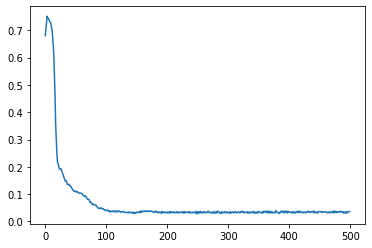

[-5.05183452 -0.27165349  0.02984725 -0.11000838 -0.20263771 -0.07660979
 -0.11924069 -0.18979983 -0.08780426 -0.46998726]
501


In [6]:
Entrada1 = np.loadtxt("/content/drive/MyDrive/Graduação/10º Período 2022 2/ELT451/Trabalhos/R4/entradasclassalunos.txt")
Saida = np.loadtxt("/content/drive/MyDrive/Graduação/10º Período 2022 2/ELT451/Trabalhos/R4/saidaclassalunos.txt")

X1 = pd.DataFrame(Entrada1, columns=["X1", "X2", "X3", "X4", "X5", "X6","X7", "X8", "X9"])
X1["B"] = -1
X1["Y"] = Saida
X1 = X1.dropna()
X1 = X1.reset_index()
del X1['index']

W00 = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.], dtype=float)
for Index in range(len(X1.columns) - 1):
  if Index == 0:
    W00[Index] = np.random.uniform(-1,1,1)
  else:
    W00[Index] = np.random.uniform(-10,10,1)
Eta = 10**(-3)
Max_Ep = 5*10**(2)              
Tol = 10**(-3)

print(X1)
print('\nW = ', W00)     

W,Erro_Med,Ep_Atual = Perceptron(X1,W00,Eta,Max_Ep,Tol)
plt.plot(Erro_Med[1:])
plt.show()
print(W)
print(Ep_Atual)

In [7]:
Entrada2 = np.loadtxt("/content/drive/MyDrive/Graduação/10º Período 2022 2/ELT451/Trabalhos/R4/entradasclassteste.txt")
X2 = pd.DataFrame(Entrada2, columns=["X1", "X2", "X3", "X4", "X5", "X6","X7", "X8", "X9"])
X2["B"] = -1
X2 = X2.dropna()
X2 = X2.reset_index()
del X2['index']

Vx2 = np.array(X2[["B","X1","X2","X3","X4","X5","X6","X7","X8","X9"]])
Yc2 = np.zeros(len(Vx2))
for Indice,Dados in enumerate(Vx2):
  Yc2[Indice] = Single_Neuron(Dados, W) #Saída calculada
print(Yc2)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1.]


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
 0, 1, 1, 0, 1, 0, 0, 1,]

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
 0, 1, 1, 0, 1, 0, 0, 1,]

In [8]:
a = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

b = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

c = a-Yc2
print(c)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
import seaborn as sns

In [10]:
X2.query('X1<5 & X7<5')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,B
0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,-1
2,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,-1
5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,-1
7,3.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,-1
9,2.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...
92,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,-1
94,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,-1
97,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,-1
98,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,-1


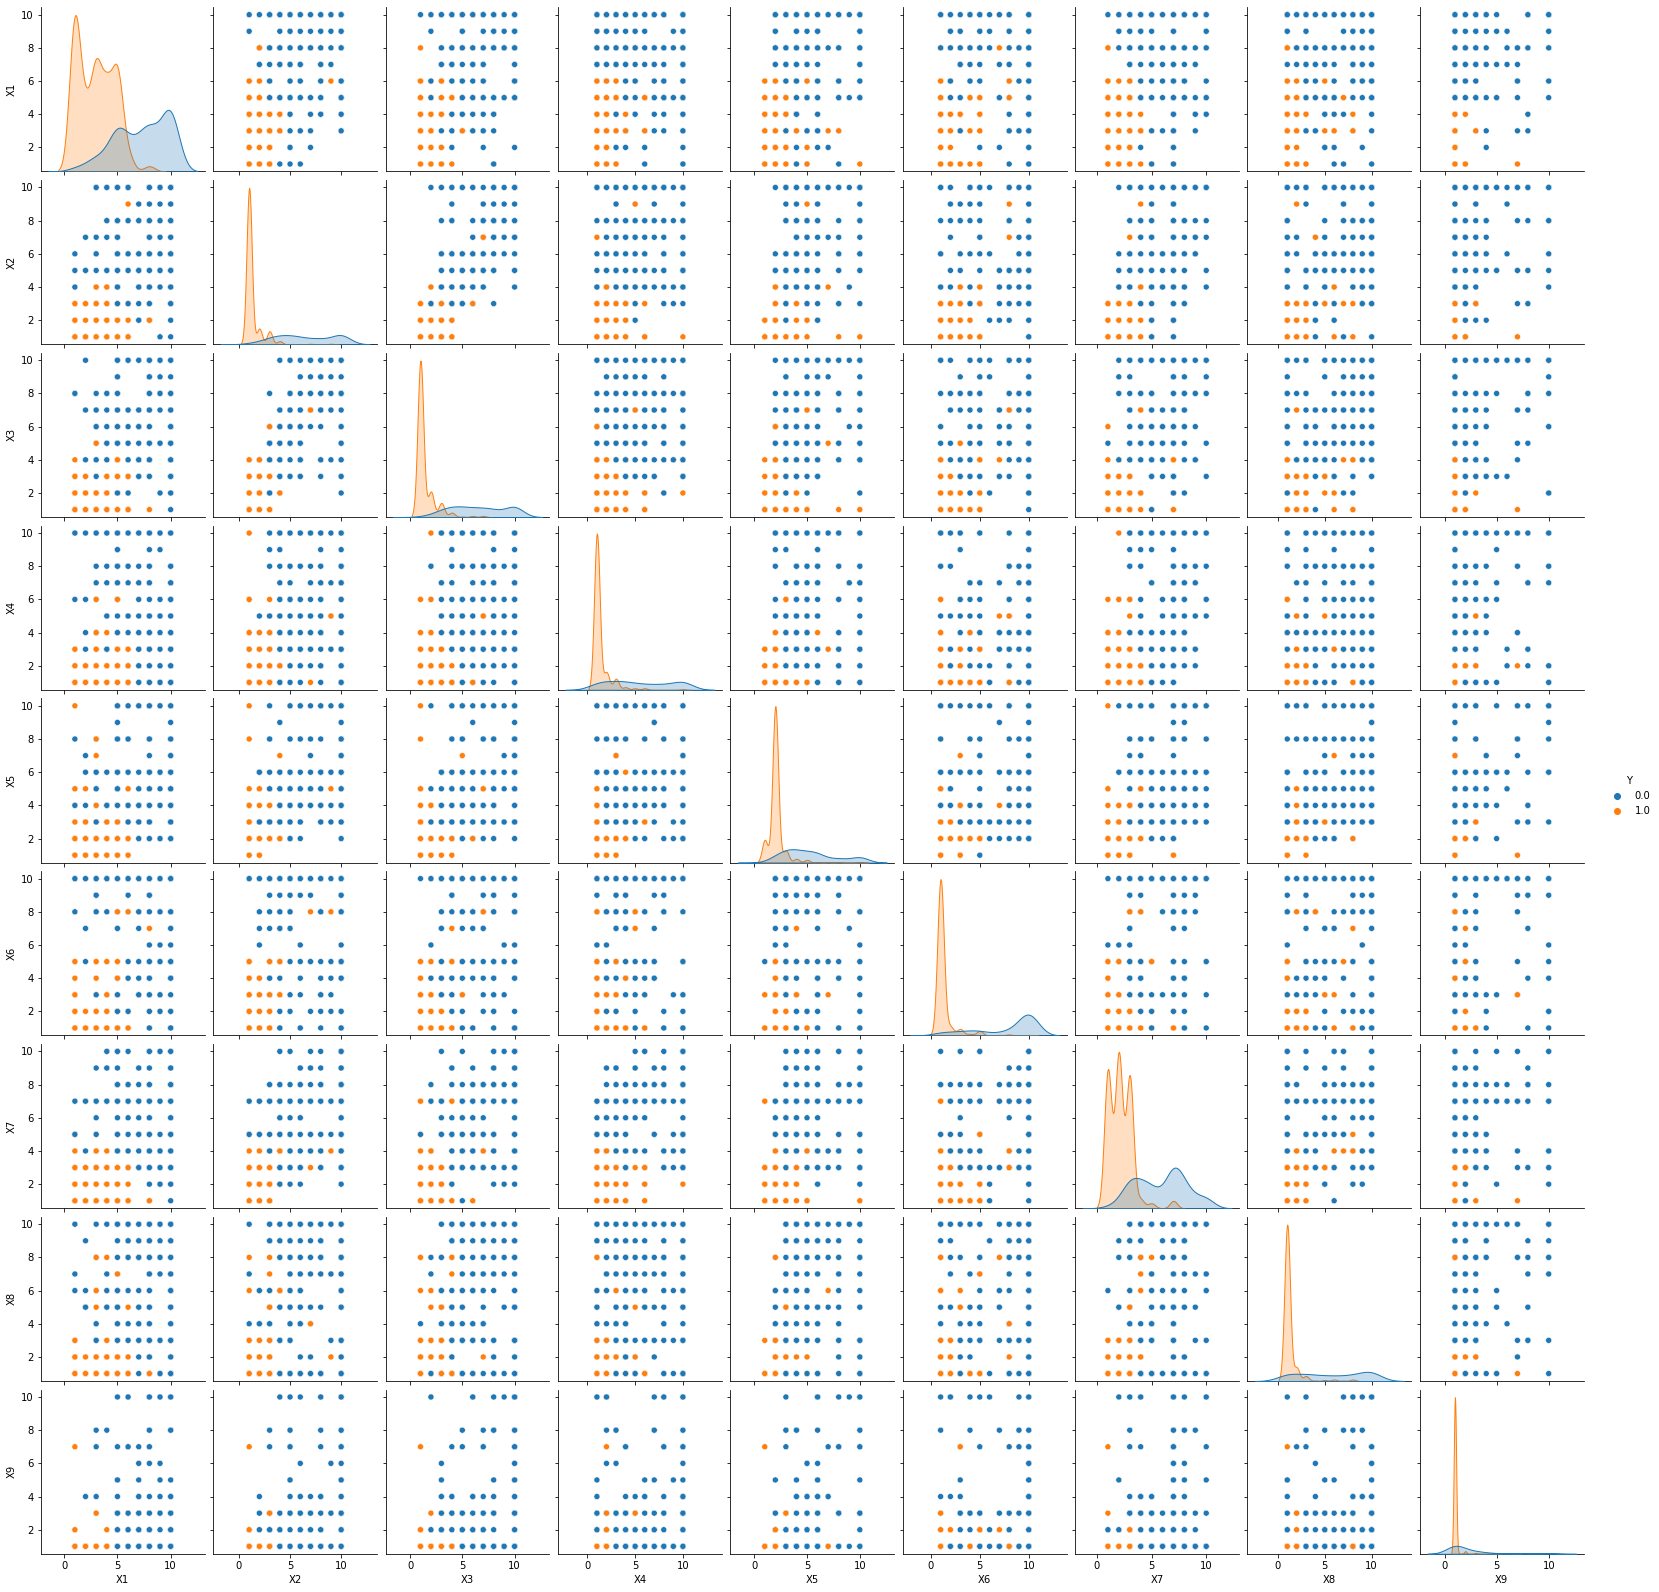

In [11]:
sns.pairplot(X1[["X1","X2","X3","X4","X5","X6","X7","X8","X9","Y"]],hue='Y')